In [4]:
import pandas as pd

# Load synthetic data
df = pd.read_csv("../data/raw/synthetic_athlete_data.csv", parse_dates=["date"])

# Preview
df.head()

,date,distance_miles,pace,avg_hr,sleep_hours,hrv,rpe,soreness,age,temp_c,humidity,wind_kph,race_pace
0,2025-06-01,4.345514,10.341872,138.936650,6.937870,65.868571,7,4,33,20.428243,43.407622,9.386683,10.675251
1,2025-06-02,3.556399,8.840534,138.037934,6.886313,81.904556,4,3,33,26.366188,51.447721,19.061817,8.419229
2,2025-06-03,4.533136,8.000284,158.125258,6.029188,50.094637,8,3,33,23.635855,47.719547,13.619927,9.187331
3,2025-06-04,5.620959,9.513274,163.562400,7.436896,54.337023,4,2,33,19.766031,56.228112,6.956464,10.441830
4,2025-06-05,3.437234,7.869016,149.279899,7.408844,60.996514,4,1,33,16.425764,89.719879,15.671448,8.509166


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            31 non-null     datetime64[ns]
 1   distance_miles  31 non-null     float64       
 2   pace            31 non-null     float64       
 3   avg_hr          31 non-null     float64       
 4   sleep_hours     31 non-null     float64       
 5   hrv             31 non-null     float64       
 6   rpe             31 non-null     int64         
 7   soreness        31 non-null     int64         
 8   age             31 non-null     int64         
 9   temp_c          31 non-null     float64       
 10  humidity        31 non-null     float64       
 11  wind_kph        31 non-null     float64       
 12  race_pace       31 non-null     float64       
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 3.3 KB


,date,distance_miles,pace,avg_hr,sleep_hours,hrv,rpe,soreness,age,temp_c,humidity,wind_kph,race_pace
count,31,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.000000,31.000000,31.000000,31.000000
mean,2025-06-16 00:00:00,3.503413,8.755405,150.456466,7.171906,59.261584,5.935484,2.612903,33.0,24.861023,53.131910,11.677619,9.510123
min,2025-06-01 00:00:00,1.864113,7.274503,123.802549,5.664983,43.925168,3.000000,1.000000,33.0,16.425764,24.622861,-0.965069,8.110055
25%,2025-06-08 12:00:00,2.981123,8.289425,144.759848,6.874899,51.486612,4.500000,1.000000,33.0,21.097834,44.157472,8.183122,8.849700
50%,2025-06-16 00:00:00,3.437234,8.758336,150.917608,7.172231,61.846339,6.000000,3.000000,33.0,25.788937,51.447721,11.761899,9.474669
75%,2025-06-23 12:00:00,4.156938,9.235744,158.172142,7.439067,64.100203,8.000000,4.000000,33.0,27.055704,63.541797,15.384992,10.117730
max,2025-07-01 00:00:00,5.690780,10.341872,165.646437,9.170594,81.904556,8.000000,4.000000,33.0,43.263657,89.719879,20.488625,11.026461
std,NaN,1.058495,0.735192,9.942127,0.771105,9.294984,1.878572,1.256382,0.0,5.197954,15.151360,4.787890,0.854944


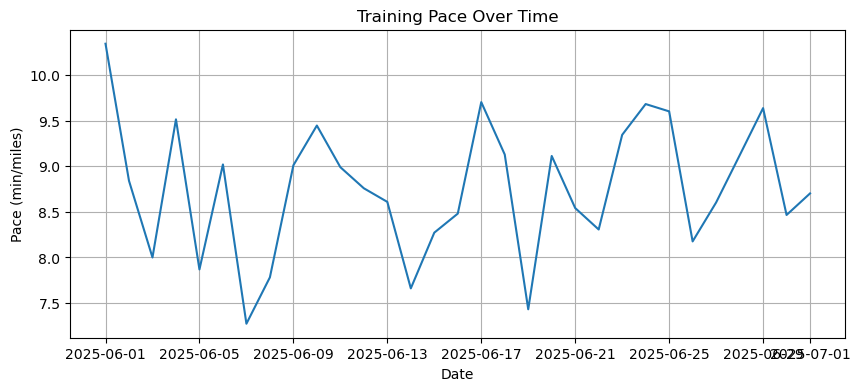

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df["date"], df["pace"])
plt.title("Training Pace Over Time")
plt.xlabel("Date")
plt.ylabel("Pace (min/miles)")
plt.grid(True)
plt.show()

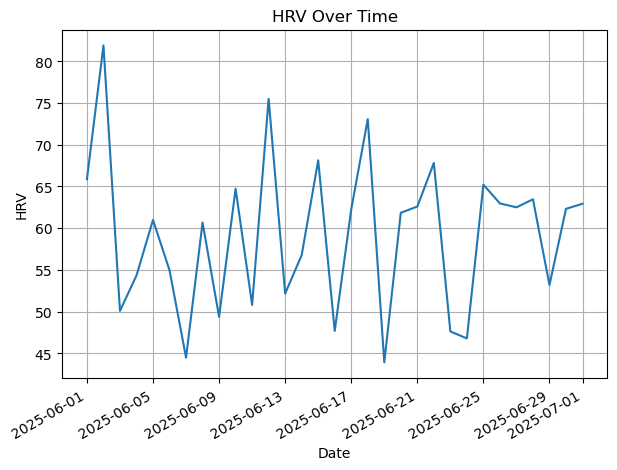

In [12]:
# HRV over time
plt.plot(df["date"], df["hrv"])
plt.title("HRV Over Time")
plt.xlabel("Date")
plt.ylabel("HRV")
plt.grid(True)
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()

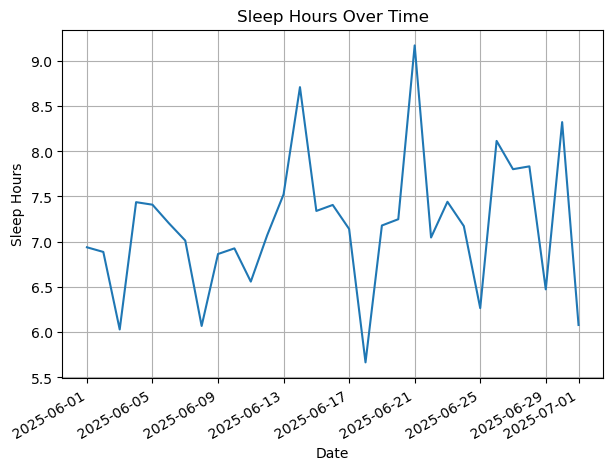

In [13]:
# Sleep over time
plt.plot(df["date"], df["sleep_hours"])
plt.title("Sleep Hours Over Time")
plt.xlabel("Date")
plt.ylabel("Sleep Hours")
plt.grid(True)
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()

<Axes: >

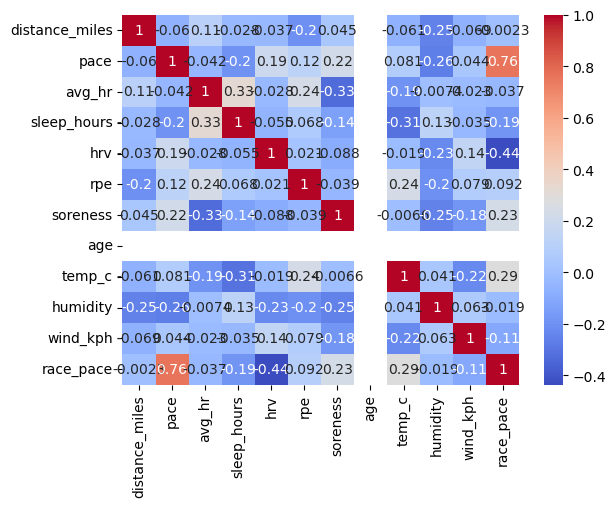

In [19]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.set(font_scale = 1.1)
corr = df.corr(numeric_only=True)

# Scatterplot HRV vs Race Pace
sns.scatterplot(x="hrv", y="race_pace", data=df, s=30, alpha = 0.6)

# Scatterplot Soreness vs Race Pace
sns.scatterplot(x="soreness", y = "race_pace", data = df, s=30, alpha = 0.6)

# Coreelation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

In [17]:
df.isna().sum()
df[df["pace"] > 10] # Very slow paces
df[df["hrv"] < 30] # Low HRV outliers

,date,distance_miles,pace,avg_hr,sleep_hours,hrv,rpe,soreness,age,temp_c,humidity,wind_kph,race_pace


In [18]:
df.to_csv("C:/Users/kemur/athlete-performance-predictor/data/processed/cleaned_data.csv", index = False)